# Bottom Temperature in different regions, PanAntarctic Comparison

In [1]:
import pandas as pd
from scipy.signal import detrend

import gsw
import glob
import dask.distributed as dsk
import matplotlib.pyplot as plt
import xarray as xr
import cf_xarray as cfxr
import numpy as np
import xesmf as xe

import cmocean as cm
import cartopy.crs as ccrs

import cartopy.feature as cft
import matplotlib.path as mpath

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
import logging
logging.getLogger("matplotlib").setLevel(logging.WARNING)

In [3]:
from dask.distributed import Client
client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33779,Workers: 0
Dashboard: /proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:38263,Total threads: 1
Dashboard: /proxy/36657/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:33137,


In [4]:
# Importing data
pan01_bottemp_1 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Adelie_pan01.nc', chunks = 'auto') 
pan005_bottemp_1 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Adelie_pan005.nc', chunks = 'auto')

pan01_bottemp_2 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Ross_pan01.nc', chunks = 'auto') 
pan005_bottemp_2 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Ross_pan005.nc', chunks = 'auto')

pan01_bottemp_3 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Am_pan01.nc', chunks = 'auto') 
pan005_bottemp_3 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Am_pan005.nc', chunks = 'auto')

pan01_bottemp_4 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Be_pan01.nc', chunks = 'auto') 
pan005_bottemp_4 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Be_pan005.nc', chunks = 'auto')

pan01_bottemp_5 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Weddell_pan01.nc', chunks = 'auto') 
pan005_bottemp_5 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Weddell_pan005.nc', chunks = 'auto')

pan01_bottemp_6 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Prydz_pan01.nc', chunks = 'auto') 
pan005_bottemp_6 = xr.open_dataarray('/g/data/g40/kc5856/access_panan_ssp126_SWMT/bottemp_anom_Prydz_pan005.nc', chunks = 'auto')

In [5]:
pan01_bottemp_1_new = pan01_bottemp_1.to_series()
pan005_bottemp_1_new = pan005_bottemp_1.to_series()

pan01_bottemp_2_new = pan01_bottemp_2.to_series()
pan005_bottemp_2_new = pan005_bottemp_2.to_series()

pan01_bottemp_3_new = pan01_bottemp_3.to_series()
pan005_bottemp_3_new = pan005_bottemp_3.to_series()

pan01_bottemp_4_new = pan01_bottemp_4.to_series()
pan005_bottemp_4_new = pan005_bottemp_4.to_series()

pan01_bottemp_5_new = pan01_bottemp_5.to_series()
pan005_bottemp_5_new = pan005_bottemp_5.to_series()

pan01_bottemp_6_new = pan01_bottemp_6.to_series()
pan005_bottemp_6_new = pan005_bottemp_6.to_series()


In [6]:
# Reset index to normalized months
pan01_bottemp_1_new.index = range(0, len(pan01_bottemp_1_new))
pan005_bottemp_1_new.index = range(0, len(pan005_bottemp_1_new))

pan01_bottemp_2_new.index = range(0, len(pan01_bottemp_2_new))
pan005_bottemp_2_new.index = range(0, len(pan005_bottemp_2_new))

pan01_bottemp_3_new.index = range(0, len(pan01_bottemp_3_new))
pan005_bottemp_3_new.index = range(0, len(pan005_bottemp_3_new))

pan01_bottemp_4_new.index = range(0, len(pan01_bottemp_4_new))
pan005_bottemp_4_new.index = range(0, len(pan005_bottemp_4_new))

pan01_bottemp_5_new.index = range(0, len(pan01_bottemp_5_new))
pan005_bottemp_5_new.index = range(0, len(pan005_bottemp_5_new))

pan01_bottemp_6_new.index = range(0, len(pan01_bottemp_6_new))
pan005_bottemp_6_new.index = range(0, len(pan005_bottemp_6_new))

Text(0.5, 1.0, 'Pan005 Time Series of Bottom Temperature on Shelf, Sector regions')

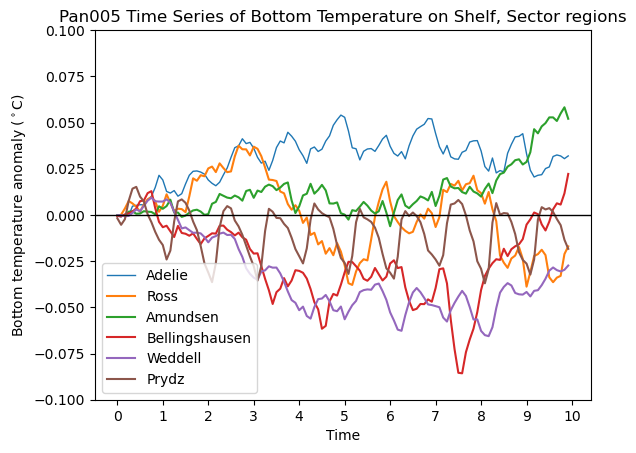

In [8]:
pan01_bottemp_1_new.plot(label="Adelie",linewidth=1)
pan01_bottemp_2_new.plot(label="Ross")
pan01_bottemp_3_new.plot(label="Amundsen")
pan01_bottemp_4_new.plot(label="Bellingshausen")
pan01_bottemp_5_new.plot(label="Weddell")
pan01_bottemp_6_new.plot(label="Prydz")
plt.ylim(-0.1,0.1)
plt.axhline(y=0, color='black', linewidth=1)
plt.ylabel("Bottom temperature anomaly ($^\circ$C)")

# Set ticks every 12 months but label in years
ticks = range(0, 121, 12)  # 0 to 120 months
labels = [str(i) for i in range(len(ticks))]
plt.xticks(ticks=ticks, labels=labels)

plt.xlabel("Time")
plt.legend(loc="lower left")
plt.title("Pan005 Time Series of Bottom Temperature on Shelf, Sector regions")

### Regular plot

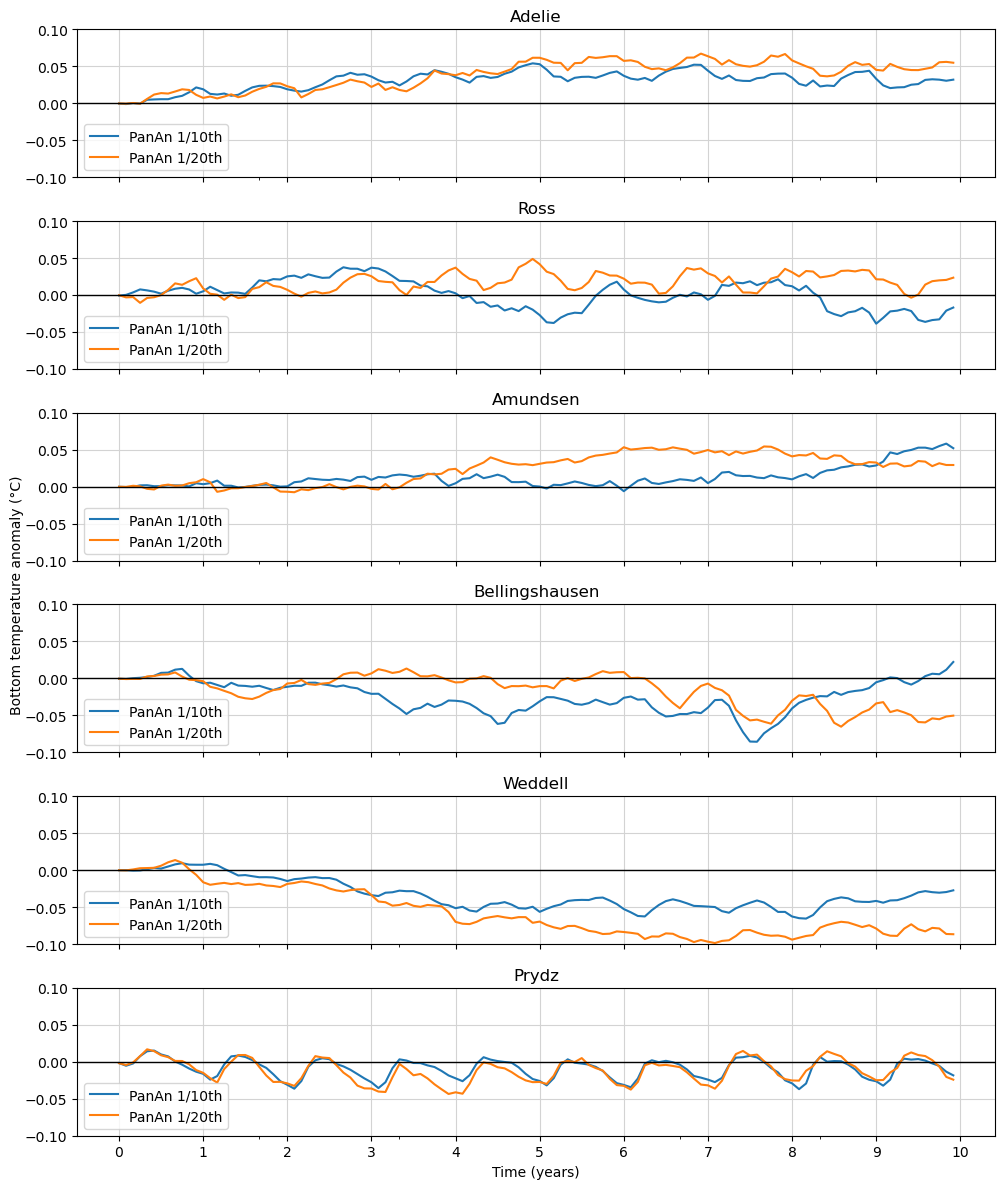

In [7]:
fig, axes = plt.subplots(
    nrows=6, ncols=1,
    sharex=True, figsize=(10, 12)
)

# First subplot: 
pan01_bottemp_1_new.plot(ax=axes[0], label="PanAn 1/10th")
pan005_bottemp_1_new.plot(ax=axes[0], label="PanAn 1/20th")
axes[0].legend(loc="lower left")
axes[0].set_title("Adelie")

# Second subplot: 
pan01_bottemp_2_new.plot(ax=axes[1], label="PanAn 1/10th")
pan005_bottemp_2_new.plot(ax=axes[1], label="PanAn 1/20th")
axes[1].legend(loc="lower left")
axes[1].set_title("Ross")

# Third subplot: 
pan01_bottemp_3_new.plot(ax=axes[2], label="PanAn 1/10th")
pan005_bottemp_3_new.plot(ax=axes[2], label="PanAn 1/20th")
axes[2].legend(loc="lower left")
axes[2].set_title("Amundsen")

# Fourth subplot: 
pan01_bottemp_4_new.plot(ax=axes[3], label="PanAn 1/10th")
pan005_bottemp_4_new.plot(ax=axes[3], label="PanAn 1/20th")
axes[3].legend(loc="lower left")
axes[3].set_title("Bellingshausen")

# Fifth subplot: 
pan01_bottemp_5_new.plot(ax=axes[4], label="PanAn 1/10th")
pan005_bottemp_5_new.plot(ax=axes[4], label="PanAn 1/20th")
axes[4].legend(loc="lower left")
axes[4].set_title("Weddell")

# Sixth subplot: 
pan01_bottemp_6_new.plot(ax=axes[5], label="PanAn 1/10th")
pan005_bottemp_6_new.plot(ax=axes[5], label="PanAn 1/20th")
axes[5].legend(loc="lower left")
axes[5].set_title("Prydz")

# Apply consistent y-limits and horizontal line for all subplots
for ax in axes:
    ax.axhline(y=0, color='black', linewidth=1)
    ax.set_ylim(-0.1, 0.1)
    ax.grid(True, color='lightgrey')

# Common X-axis label
axes[-1].set_xlabel("Time (years)")

# Common Y-axis label
fig.text(0, 0.5, "Bottom temperature anomaly (°C)", va='center', rotation='vertical')

# Set ticks every 12 months but label in years
ticks = range(0, 121, 12)  # 0 to 120 months
labels = [str(i) for i in range(len(ticks))]
plt.xticks(ticks=ticks, labels=labels)

# Adjust layout
plt.tight_layout()
plt.show()

### 12-month running mean

In [8]:
# Compute 12-month running means
pan01_bottemp_1_rm = pan01_bottemp_1_new.rolling(window=12, center=True).mean()
pan005_bottemp_1_rm = pan005_bottemp_1_new.rolling(window=12, center=True).mean()

pan01_bottemp_2_rm = pan01_bottemp_2_new.rolling(window=12, center=True).mean()
pan005_bottemp_2_rm = pan005_bottemp_2_new.rolling(window=12, center=True).mean()

pan01_bottemp_3_rm = pan01_bottemp_3_new.rolling(window=12, center=True).mean()
pan005_bottemp_3_rm = pan005_bottemp_3_new.rolling(window=12, center=True).mean()

pan01_bottemp_4_rm = pan01_bottemp_4_new.rolling(window=12, center=True).mean()
pan005_bottemp_4_rm = pan005_bottemp_4_new.rolling(window=12, center=True).mean()

pan01_bottemp_5_rm = pan01_bottemp_5_new.rolling(window=12, center=True).mean()
pan005_bottemp_5_rm = pan005_bottemp_5_new.rolling(window=12, center=True).mean()

pan01_bottemp_6_rm = pan01_bottemp_6_new.rolling(window=12, center=True).mean()
pan005_bottemp_6_rm = pan005_bottemp_6_new.rolling(window=12, center=True).mean()

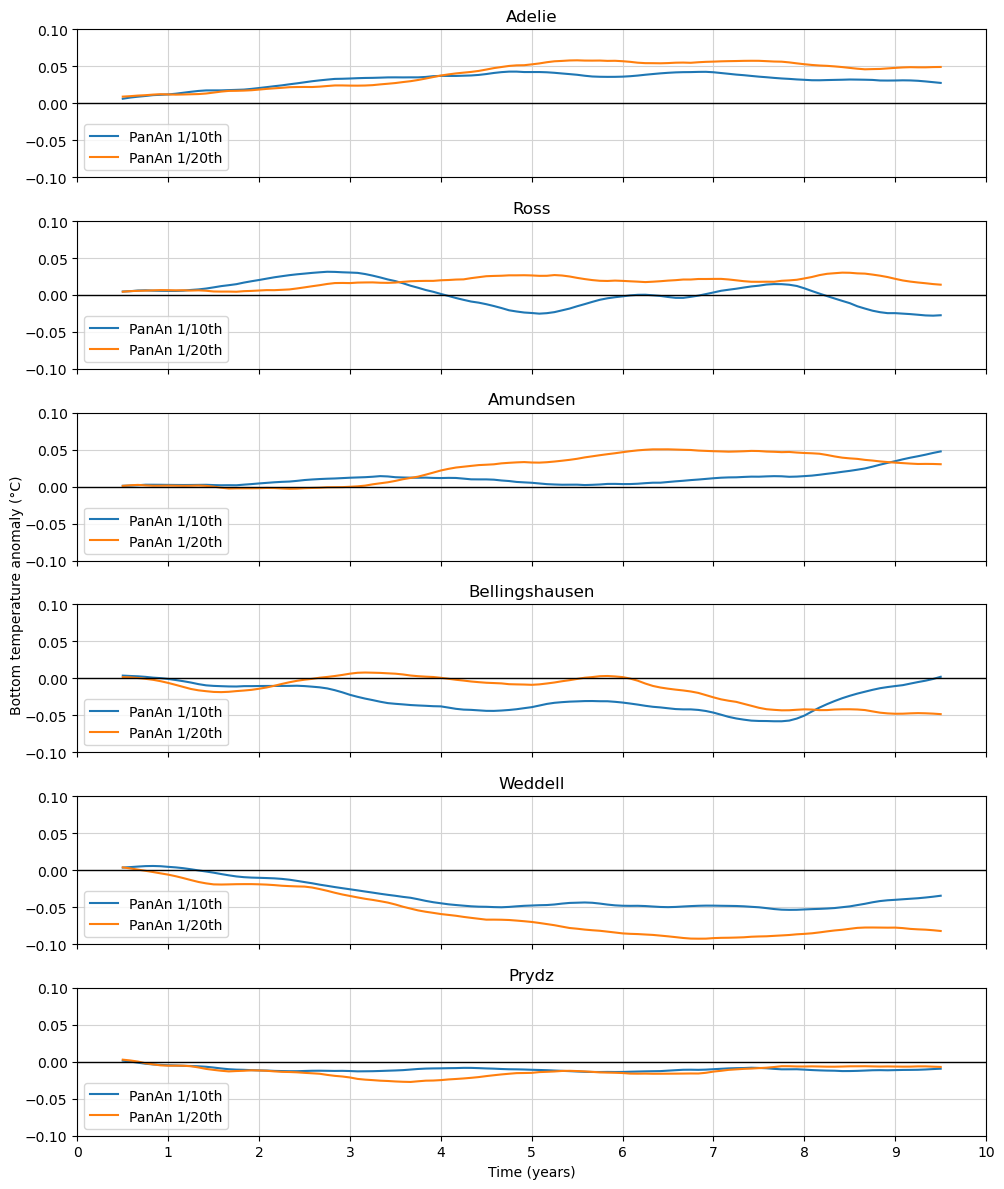

In [15]:
# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=1, sharex=True, figsize=(10, 12))

region_titles = ["Adelie", "Ross", "Amundsen", "Bellingshausen", "Weddell", "Prydz"]
pan01_rms = [pan01_bottemp_1_rm, pan01_bottemp_2_rm, pan01_bottemp_3_rm, pan01_bottemp_4_rm, pan01_bottemp_5_rm, pan01_bottemp_6_rm]
pan005_rms = [pan005_bottemp_1_rm, pan005_bottemp_2_rm, pan005_bottemp_3_rm, pan005_bottemp_4_rm, pan005_bottemp_5_rm, pan005_bottemp_6_rm]

for i, ax in enumerate(axes):
    ax.plot(pan01_rms[i].index, pan01_rms[i], label="PanAn 1/10th")
    ax.plot(pan005_rms[i].index, pan005_rms[i], label="PanAn 1/20th")
    ax.legend(loc="lower left")
    ax.set_title(region_titles[i])
    ax.axhline(y=0, color='black', linewidth=1)
    ax.set_ylim(-0.1, 0.1)
    ax.grid(True, color='lightgrey')

# Set ticks every 12 months but label in years
ticks = range(0, 121, 12)  # 0 to 120 months
labels = [str(i) for i in range(len(ticks))]
plt.xticks(ticks=ticks, labels=labels)

# Common X-axis label
axes[-1].set_xlabel("Time (years)")

# Common Y-axis label
fig.text(0, 0.5, "Bottom temperature anomaly (°C)", va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
pan01_rms = [
    pan01_bottemp_1_new.rolling(window=12, center=True).mean(),
    pan01_bottemp_2_new.rolling(window=12, center=True).mean(),
    pan01_bottemp_3_new.rolling(window=12, center=True).mean(),
    pan01_bottemp_4_new.rolling(window=12, center=True).mean(),
    pan01_bottemp_5_new.rolling(window=12, center=True).mean(),
    pan01_bottemp_6_new.rolling(window=12, center=True).mean()
]

pan005_rms = [
    pan005_bottemp_1_new.rolling(window=12, center=True).mean(),
    pan005_bottemp_2_new.rolling(window=12, center=True).mean(),
    pan005_bottemp_3_new.rolling(window=12, center=True).mean(),
    pan005_bottemp_4_new.rolling(window=12, center=True).mean(),
    pan005_bottemp_5_new.rolling(window=12, center=True).mean(),
    pan005_bottemp_6_new.rolling(window=12, center=True).mean()
]

region_titles = ["Adelie", "Ross", "Amundsen", "Bellingshausen", "Weddell", "Prydz"]

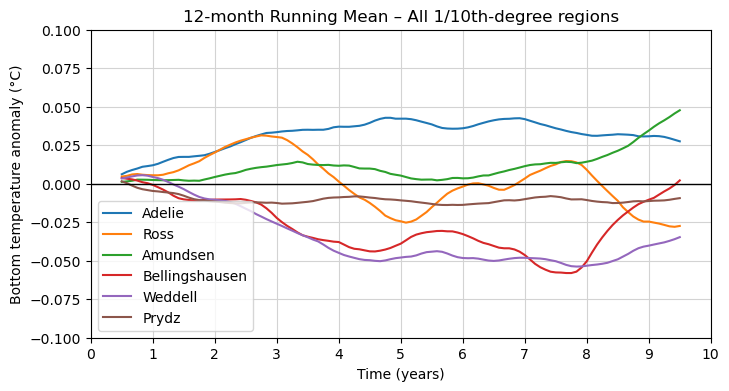

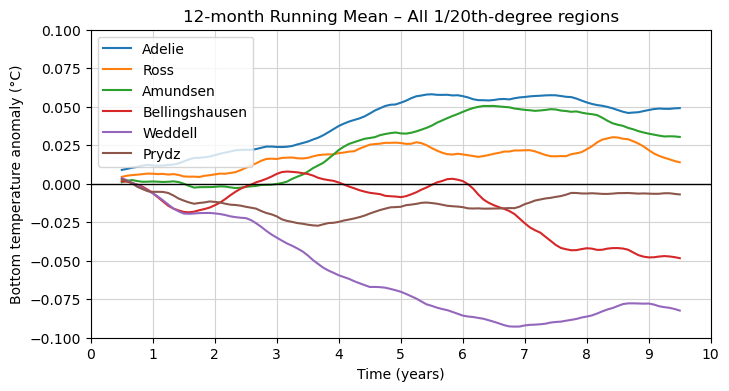

In [17]:
# --- Plot for all 1/10th-degree regions ---
plt.figure(figsize=(8,4))
plt.ylim(-0.1, 0.1)
for rms, title in zip(pan01_rms, region_titles):
    plt.plot(rms.index, rms, label=title)
plt.axhline(0, color='black', linewidth=1)

# Set ticks every 12 months but label in years
ticks = range(0, 121, 12)  # 0 to 120 months
labels = [str(i) for i in range(len(ticks))]
plt.xticks(ticks=ticks, labels=labels)

plt.xlabel("Time (years)")
plt.ylabel("Bottom temperature anomaly (°C)")
plt.title("12-month Running Mean – All 1/10th-degree regions")
plt.legend()
plt.grid(True, color='lightgrey')
plt.show()

# --- Plot for all 1/20th-degree regions ---
plt.figure(figsize=(8,4))
plt.ylim(-0.1, 0.1)
for rms, title in zip(pan005_rms, region_titles):
    plt.plot(rms.index, rms, label=title)
plt.axhline(0, color='black', linewidth=1)

# Set ticks every 12 months but label in years
ticks = range(0, 121, 12)  # 0 to 120 months
labels = [str(i) for i in range(len(ticks))]
plt.xticks(ticks=ticks, labels=labels)



plt.xlabel("Time (years)")
plt.ylabel("Bottom temperature anomaly (°C)")
plt.title("12-month Running Mean – All 1/20th-degree regions")
plt.legend()
plt.grid(True, color='lightgrey')
plt.show()